# Data Cleaning & Analysis Template
This notebook provides a structured approach to data cleaning and preprocessing for both tabular and geospatial datasets.

In [14]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



## 1. Load Data

In [15]:
# ----------------------
# 1. Load Data
# ----------------------
DEFAULT_DATA_DIR = r"C:\Users\manoe.MC_ASUS\Documents\IRON HACK BOOTCAMP\DAFT_Feb 2025\projects\Project 5\Project-5---Vanguard\1.0 - data\1.1 - raw"

def load_data(file_name):
    """Load a dataset from the default directory and return it as a DataFrame."""
    file_path = os.path.join(DEFAULT_DATA_DIR, file_name)
    return pd.read_csv(file_path)




In [16]:
#2. Exemple Usage 

if __name__ == "__main__":
    # Define datasets
    datasets = {
        "df_final_demo": "df_final_demo.txt",
        "df_final_experiment_clients": "df_final_experiment_clients.txt",
        "df_final_web_data_pt_1": "df_final_web_data_pt_1.txt",
        "df_final_web_data_pt_2": "df_final_web_data_pt_2.txt"
    }
    
    # Load datasets dynamically into separate variables and store them globally
    globals()["df_final_demo"] = load_data(datasets["df_final_demo"])
    globals()["df_final_experiment_clients"] = load_data(datasets["df_final_experiment_clients"])
    globals()["df_final_web_data_pt_1"] = load_data(datasets["df_final_web_data_pt_1"])
    globals()["df_final_web_data_pt_2"] = load_data(datasets["df_final_web_data_pt_2"])

    print("Datasets loaded and assigned to variables explicitly.")


Datasets loaded and assigned to variables explicitly.


## 2. Basic Inspection

In [17]:
def inspect_data(df):
    """Prints basic inspection details of a DataFrame."""
    print("\nDataset Info:")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nFirst 5 Rows:")
    print(df.head())

def inspect_all_data(dfs):
    """Inspect all datasets dynamically."""
    for df_name, df in dfs.items():
        print(f"\n### Inspecting {df_name} ###")
        inspect_data(df)



### PART 1 Analysing DF_FINAL_DEMO

In [18]:
inspect_data(df_final_demo)


#missing values: ~15 in each column compared to client_id


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None

Summary Statistics:
           client_id  clnt_tenure_yr  clnt_tenure_mnth      clnt_age  gendr  \
count   7.060900e+04    70595.000000      70595.000000  70594.000000  70595   
unique           NaN             NaN               NaN           NaN      4   
top              NaN             Na

In [19]:
df_final_demo.describe().round()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,70609.0,70595.0,70595.0,70594.0,70595.0,70595.0,70595.0,70595.0
mean,5004992.0,12.0,151.0,46.0,2.0,147445.0,3.0,6.0
std,2877278.0,7.0,82.0,16.0,1.0,301509.0,2.0,2.0
min,169.0,2.0,33.0,14.0,1.0,13789.0,0.0,1.0
25%,2519329.0,6.0,82.0,32.0,2.0,37347.0,1.0,4.0
50%,5016978.0,11.0,136.0,47.0,2.0,63333.0,3.0,5.0
75%,7483085.0,16.0,192.0,59.0,2.0,137545.0,6.0,7.0
max,9999839.0,62.0,749.0,96.0,8.0,16320040.0,7.0,9.0


In [20]:
df_final_demo["clnt_age"] = pd.to_numeric(df_final_demo["clnt_age"], errors="coerce")


## 1.1 Grouping BY AGE

In [21]:
def categorize_age(age):
    if 10 <= age <= 20:
        return "10-20"
    elif 21 <= age <= 30:
        return "21-30"
    elif 31 <= age <= 40:
        return "31-40"
    elif 41 <= age <= 50:
        return "41-50"
    elif 51 <= age <= 60:
        return "51-60"
    elif 61 <= age <= 70:
        return "61-70"
    elif 71 <= age <= 80:
        return "71-80"
    elif 81 <= age <= 90:
        return "81-90"
    else:
        return "91-100"

    
df_final_demo["age_group"] = df_final_demo["clnt_age"].apply(categorize_age)

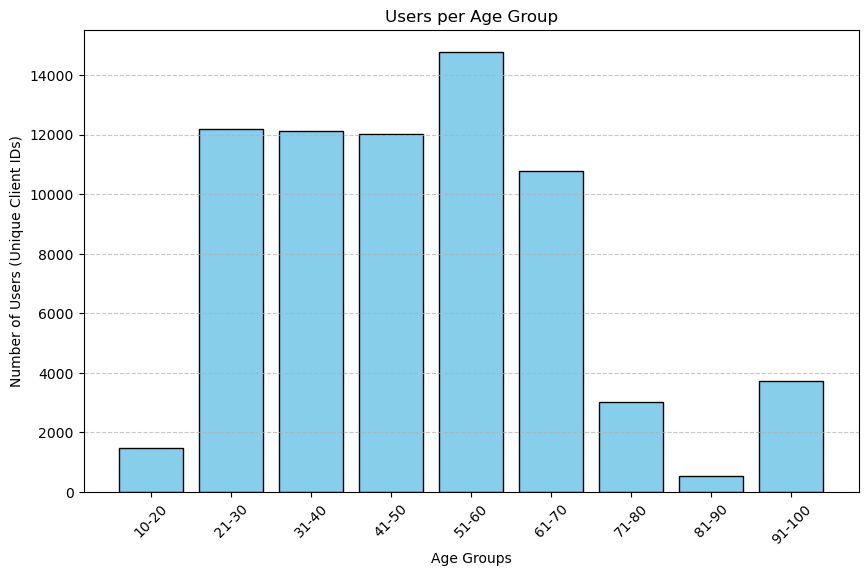

In [22]:
import matplotlib.pyplot as plt

age_group_counts = df_final_demo.groupby("age_group")["client_id"].nunique().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue', edgecolor='black')
plt.xlabel("Age Groups")
plt.ylabel("Number of Users (Unique Client IDs)")
plt.title("Users per Age Group")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.show()



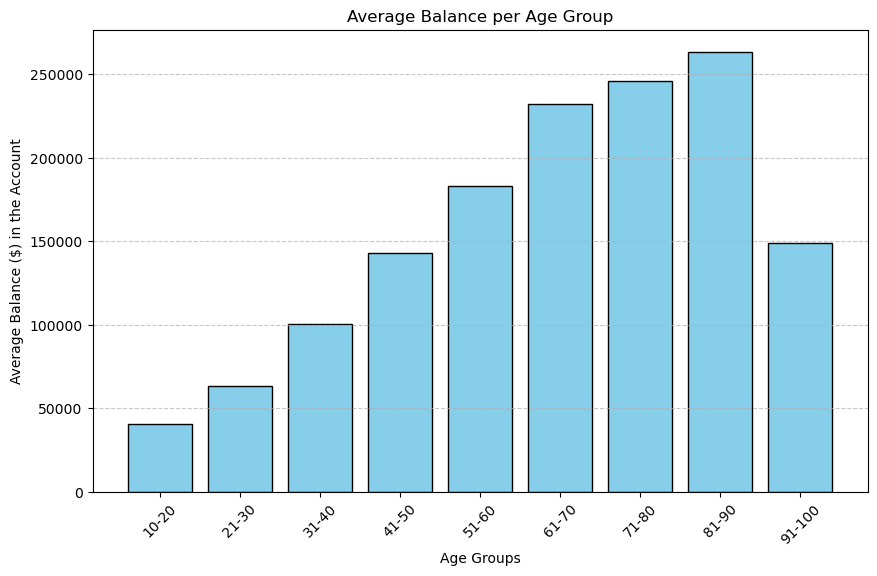

In [23]:
import matplotlib.pyplot as plt

# Aggregate balance per age group (sum, mean, or median)
age_group_balances = df_final_demo.groupby("age_group")["bal"].mean() 
# Plot
plt.figure(figsize=(10, 6))
plt.bar(age_group_balances.index, age_group_balances.values, color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel("Age Groups")
plt.ylabel("Average Balance ($) in the Account")
plt.title("Average Balance per Age Group")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()



## 1.2 UNIVARIATE ANALYSIS - BALANCE

In [24]:
df_final_demo['bal'] = np.ceil(df_final_demo['bal'])
df_final_demo.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
0,836976,6.0,73.0,60.5,U,2.0,45106.0,6.0,9.0,91-100
1,2304905,7.0,94.0,58.0,U,2.0,110861.0,6.0,9.0,51-60
2,1439522,5.0,64.0,32.0,U,2.0,52468.0,6.0,9.0,31-40
3,1562045,16.0,198.0,49.0,M,2.0,67455.0,3.0,6.0,41-50
4,5126305,12.0,145.0,33.0,F,2.0,103672.0,0.0,3.0,31-40
5,3727881,5.0,71.0,30.5,U,2.0,23916.0,0.0,3.0,91-100
6,272934,5.0,66.0,58.5,U,2.0,27022.0,2.0,5.0,51-60
7,388801,30.0,361.0,57.5,M,5.0,522499.0,1.0,4.0,51-60
8,285619,30.0,369.0,67.5,M,2.0,299389.0,3.0,6.0,61-70
9,8198645,15.0,189.0,54.5,F,2.0,382304.0,6.0,9.0,51-60


In [25]:
data = df_final_demo['bal'] 

# Calculate IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df_final_demo[(data < lower_bound) | (data > upper_bound)].round(2).copy()
outliers["Deviation from Lower Bound"] = outliers['bal'] - lower_bound
outliers["Deviation from Upper Bound"] = upper_bound - outliers['bal']


print(outliers[['bal', "Deviation from Lower Bound", "Deviation from Upper Bound"]].head())


          bal  Deviation from Lower Bound  Deviation from Upper Bound
7    522499.0                    635448.5                   -234656.5
8    299389.0                    412338.5                    -11546.5
9    382304.0                    495253.5                    -94461.5
21  2768727.0                   2881676.5                  -2480884.5
37   439724.0                    552673.5                   -151881.5


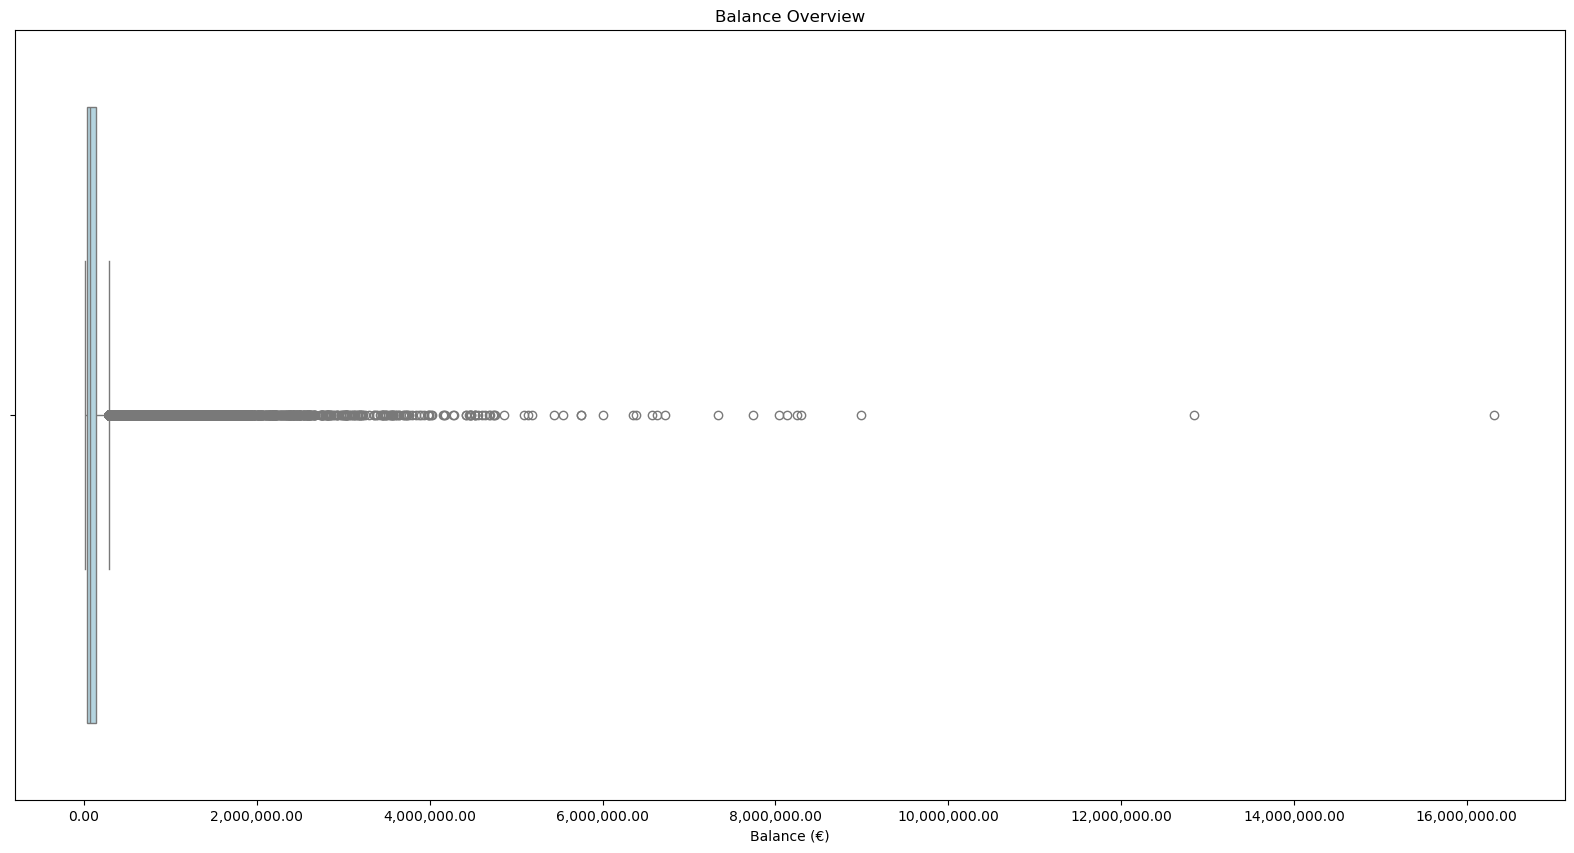

In [26]:
import matplotlib.ticker as ticker

plt.figure(figsize=(20, 10))
sns.boxplot(x=df_final_demo['bal'], color="lightblue")

# Format x-axis to display as financial values
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.2f}"))
plt.title("Balance Overview")
plt.xlabel("Balance (€)")
plt.show()


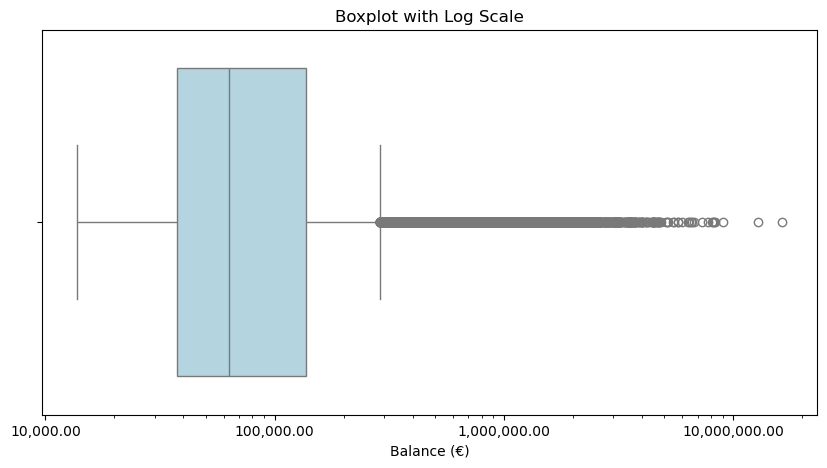

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_final_demo['bal'], color="lightblue")
plt.xscale("log")

# Format x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.2f}"))
plt.title("Boxplot with Log Scale")
plt.xlabel("Balance (€)")
plt.show()


### PART 2: ANALYSIS df_final_experiment_clients

In [14]:
inspect_data(df_final_experiment_clients)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None

Summary Statistics:
           client_id Variation
count   7.060900e+04     50500
unique           NaN         2
top              NaN      Test
freq             NaN     26968
mean    5.004992e+06       NaN
std     2.877278e+06       NaN
min     1.690000e+02       NaN
25%     2.519329e+06       NaN
50%     5.016978e+06       NaN
75%     7.483085e+06       NaN
max     9.999839e+06       NaN

Missing Values:
client_id        0
Variation    20109
dtype: int64

First 5 Rows:
   client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control
3    1982004      Test
4    9294070   Control


In [15]:
inspect_data(df_final_web_data_pt_1)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB
None

Summary Statistics:
           client_id             visitor_id                     visit_id  \
count   3.431410e+05                 343141                       343141   
unique           NaN                  62936                        75256   
top              NaN  699275239_82397698587  712824876_8175482950_365042   
freq             NaN                     66                           61   
mean    4.996097e+06                    NaN                          NaN   
std     2.875839e+06                    N

In [16]:
inspect_data(df_final_web_data_pt_2)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB
None

Summary Statistics:
           client_id            visitor_id                      visit_id  \
count   4.122640e+05                412264                        412264   
unique           NaN                 71042                         82841   
top              NaN  722943003_3441581446  875138661_34710212496_881092   
freq             NaN                   104                           104   
mean    5.028227e+06                   NaN                           NaN   
std     2.881828e+06                   Na

## 3. Handle Missing Values

In [17]:
def handle_missing_values(df, method='ffill'):
    if method == 'drop':
        return df.dropna()
    return df.fillna(method=method)

## 4. Handle Duplicates

In [18]:
def remove_duplicates(df):
    return df.drop_duplicates()

## 5. Data Type Conversion

In [19]:
def convert_data_types(df, date_columns=None, category_columns=None):
    if date_columns:
        for col in date_columns:
            df[col] = pd.to_datetime(df[col])
    if category_columns:
        for col in category_columns:
            df[col] = df[col].astype('category')
    return df

## 6. Detect Outliers

In [20]:
def detect_outliers(df, column):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Outlier Detection - {column}')
    plt.show()

## 7. Feature Engineering

In [21]:
def create_features(df):
    if 'column1' in df.columns and 'column2' in df.columns:
        df['new_feature'] = df['column1'] / (df['column2'] + 1e-9)  # Avoid division by zero
    return df

## 8. Normalize/Scale Data

In [22]:
def normalize_data(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

## 9. Save Cleaned Data

In [23]:
def save_data(df, file_path, is_geospatial=False):
    if is_geospatial:
        df.to_file(file_path, driver='GeoJSON')
    else:
        df.to_csv(file_path, index=False)

## Example Usage

In [24]:
if __name__ == "__main__":
    file_path = "your_dataset.csv"
    is_geospatial = False
    
    df = load_data(file_path, is_geospatial)
    inspect_data(df)
    df = handle_missing_values(df, method='ffill')
    df = remove_duplicates(df)
    df = convert_data_types(df, date_columns=['date_column'], category_columns=['category_column'])
    df = create_features(df)
    df = normalize_data(df, columns=['numeric_column'])
    
    if is_geospatial:
        df = clean_geospatial_data(df)
    
    save_data(df, "cleaned_data.csv", is_geospatial)
    print("Data cleaning complete and saved.")

TypeError: load_data() takes 1 positional argument but 2 were given